In [73]:
import sys
# win:
project_path = 'D:/Code/repos/pwreg'
sys.path.insert(1, f'{project_path}/pwreg')

from utils.cnn import CnnPredictor
from core.core import *
from visualize.viewers import *
from utils.napari_utils import *
from utils.utils import *
from utils.synapse import *

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
resolution = [0.658, 0.23, 0.23]
fixed_prob = Image(resolution, filename = "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/1-20FJ_global_040422_prob_map.tif")
moving_prob = Image(resolution, filename = "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/1-20FM_global_040422_prob_map.tif")
warped_prob = Image(resolution, filename = "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/prob_map_warped.tif")

print(f"Fixed : {fixed_prob.shape}")
print(f"max : {np.max(fixed_prob.img)}, min : {np.min(fixed_prob.img)}")

print(f"Moving :{moving_prob.shape}")
print(f"max : {np.max(moving_prob.img)}, min : {np.min(moving_prob.img)}")

print(f"Warped :{warped_prob.shape}")
print(f"max : {np.max(warped_prob.img)}, min : {np.min(warped_prob.img)}")

Fixed : (118, 1024, 1024)
max : 9998, min : 0
Moving :(114, 1024, 1024)
max : 9997, min : 0
Warped :(118, 1024, 1024)
max : 9997, min : 0


In [61]:
fixed_lm1 = fixed_prob.local_max(1)
fixed_lm2 = fixed_prob.local_max(2)

moving_lm1 = moving_prob.local_max(1)
moving_lm2 = moving_prob.local_max(2)

alignmnet = from_json(AffineTransform, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/transform_list.json")
warped_lm1 = moving_lm1.transform(alignmnet[0])
warped_lm2 = moving_lm2.transform(alignmnet[0])

In [63]:
to_json(fixed_lm1, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/fixed_prob_order1.json")
to_json(fixed_lm2, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/fixed_prob_order2.json")

to_json(moving_lm1, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/moving_prob_order1.json")
to_json(moving_lm2, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/moving_prob_order2.json")

to_json(warped_lm1, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/warped_prob_order1.json")
to_json(warped_lm2, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/warped_prob_order2.json")

Text(0, 0.5, 'Number of spots')

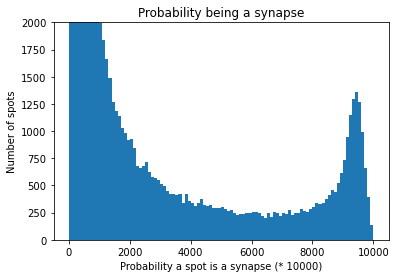

In [64]:
plt.hist(fixed_lm1.info['values'], bins = 100);
plt.ylim(0,2000)
plt.title('Probability being a synapse')
plt.xlabel('Probability a spot is a synapse (* 10000)')
plt.ylabel('Number of spots')


Text(0, 0.5, 'Number of spots')

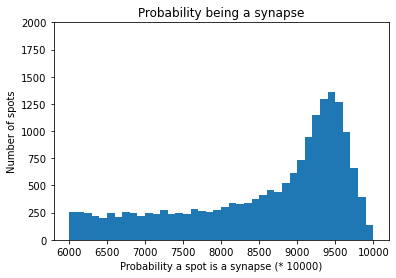

In [65]:
SCALE = 10000
filtered_fixed_lm1 = fixed_lm1.filter_by_info('values', {'min':0.6*SCALE})

plt.hist(filtered_fixed_lm1.info['values'], bins = 40);
plt.ylim(0,2000)
plt.title('Probability being a synapse')
plt.xlabel('Probability a spot is a synapse (* 10000)')
plt.ylabel('Number of spots')


In [66]:
SCALE = 10000
filtered_fixed_lm1 = fixed_lm1.filter_by_info('values', {'min':0.6*SCALE})
filtered_fixed_lm2 = fixed_lm2.filter_by_info('values', {'min':0.6*SCALE})
filtered_moving_lm1 = moving_lm1.filter_by_info('values', {'min':0.6*SCALE})
filtered_moving_lm2 = moving_lm2.filter_by_info('values', {'min':0.6*SCALE})
filtered_warped_lm1 = warped_lm1.filter_by_info('values', {'min':0.6*SCALE})
filtered_warped_lm2 = warped_lm2.filter_by_info('values', {'min':0.6*SCALE})

In [67]:
to_json(filtered_fixed_lm1, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/filtered_0p6_fixed_prob_order1.json")
to_json(filtered_fixed_lm2, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/filtered_0p6_fixed_prob_order2.json")

to_json(filtered_moving_lm1, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/filtered_0p6_moving_prob_order1.json")
to_json(filtered_moving_lm2, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/filtered_0p6_moving_prob_order2.json")

to_json(filtered_warped_lm1, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/filtered_0p6_warped_prob_order1.json")
to_json(filtered_warped_lm2, "D:/Code/repos/pwreg/data/processed/registered/no_change_control/testing_April/ptc_from_prob/ptcs/filtered_0p6_warped_prob_order2.json")

In [71]:
imgptc = ImagePointsView(images = {'fixed_prob' : fixed_prob,'warped_prob' : warped_prob},
                         point_clouds = {'filtered_fixed_lm1':filtered_fixed_lm1,'filtered_warped_lm1':filtered_warped_lm1},
                         resolution = resolution)
imgptc.view_in_napari(['red','green'],['yellow','cyan'])

In [80]:
filtered_fixed_lm1.reset_idx()
filtered_warped_lm1.reset_idx()
sp = SynapsePair(filtered_fixed_lm1, warped_lm1, 1.5)
sp.pair()
sp.summary()

Total before: 17976
Total after: 2242688
Fraction lost: 0.050734312416555405
Fraction gained: 123.81085892300845


In [85]:
filtered_warped_lm1 = warped_lm1.filter_by_info('values', {'min':0.1*SCALE})
filtered_warped_lm1.reset_idx()
sp = SynapsePair(filtered_fixed_lm1, filtered_warped_lm1, 1.5)
sp.pair()
sp.summary()

Total before: 17976
Total after: 46172
Fraction lost: 0.13111927013796174
Fraction gained: 1.699655095683133


In [87]:
diff_img = Image(resolution, img = fixed_prob.img - warped_prob.img)
imgptc = ImagePointsView(images = {'fixed_prob' : fixed_prob,'warped_prob' : warped_prob, 'diff_img' : diff_img},
                         point_clouds = {'filtered_fixed_lm1':filtered_fixed_lm1,'filtered_warped_lm1':filtered_warped_lm1},
                         resolution = [0.658, 0.23, 0.23])
imgptc.view_in_napari(['cyan','yellow','magenta'],['yellow','cyan'])

In [92]:
fixed_prob.crop({'zmax':102})
warped_prob.crop({'zmax':102})

fixed_lm1 = fixed_prob.local_max(1)
warped_lm1 = warped_prob.local_max(1)

filtered_fixed_lm1 = fixed_lm1.filter_by_info('values', {'min':0.6*SCALE})
filtered_warped_lm1 = warped_lm1.filter_by_info('values', {'min':0.1*SCALE})

diff_img = Image(resolution, img = fixed_prob.img - warped_prob.img)
imgptc = ImagePointsView(images = {'fixed_prob' : fixed_prob,'warped_prob' : warped_prob, 'diff_img' : diff_img},
                         point_clouds = {'filtered_fixed_lm1':filtered_fixed_lm1,'filtered_warped_lm1':filtered_warped_lm1},
                         resolution = [0.658, 0.23, 0.23])
imgptc.view_in_napari(['cyan','yellow','magenta'],['yellow','cyan'])

In [93]:
filtered_fixed_lm1.reset_idx()
filtered_warped_lm1.reset_idx()
sp = SynapsePair(filtered_fixed_lm1, filtered_warped_lm1, 1.5)
sp.pair()
sp.summary()

Total before: 16652
Total after: 44129
Fraction lost: 0.08917847705981263
Fraction gained: 1.7392505404756184


In [98]:

imgptc = ImagePointsView(images = {'fixed_prob' : fixed_prob,'warped_prob' : warped_prob},
                         point_clouds = {'lost':sp.lost, 'gained':sp.gained,'all_before':filtered_warped_lm1},
                         resolution = [0.658, 0.23, 0.23])
imgptc.view_in_napari(['red','green'],['cyan','yellow','magenta'])

In [99]:
filtered_fixed_lm1.reset_idx()
filtered_warped_lm1.reset_idx()
sp = SynapsePair(filtered_fixed_lm1, filtered_warped_lm1, 2.5)
sp.pair()
sp.summary()

Total before: 16652
Total after: 44129
Fraction lost: 0.03038674033149171
Fraction gained: 1.6804588037472976


In [ ]:
fixed_prob.crop({'zmax':102})
warped_prob.crop({'zmax':102})

fixed_lm1 = fixed_prob.local_max(1)
warped_lm1 = warped_prob.local_max(1)


In [100]:
thr_list = [0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65, 0.7]
rad_list = [1.5, 2.0, 2.5, 3.0, 4.0]

filtered_fixed_lm1 = fixed_lm1.filter_by_info('values', {'min':0.6*SCALE})
filtered_fixed_lm1.reset_idx()

fr_lost = {}
for radius in rad_list:
    fr_lost[f'radius {radius}'] = []
    for thr in thr_list:
        
        filtered_warped_lm1 = warped_lm1.filter_by_info('values', {'min':thr*SCALE})
        filtered_warped_lm1.reset_idx()
        
        sp = SynapsePair(filtered_fixed_lm1, filtered_warped_lm1, radius)
        sp.pair()
        
        fr_lost[f'radius {radius}'].append(sp.fr_lost)

(0.0, 0.3)

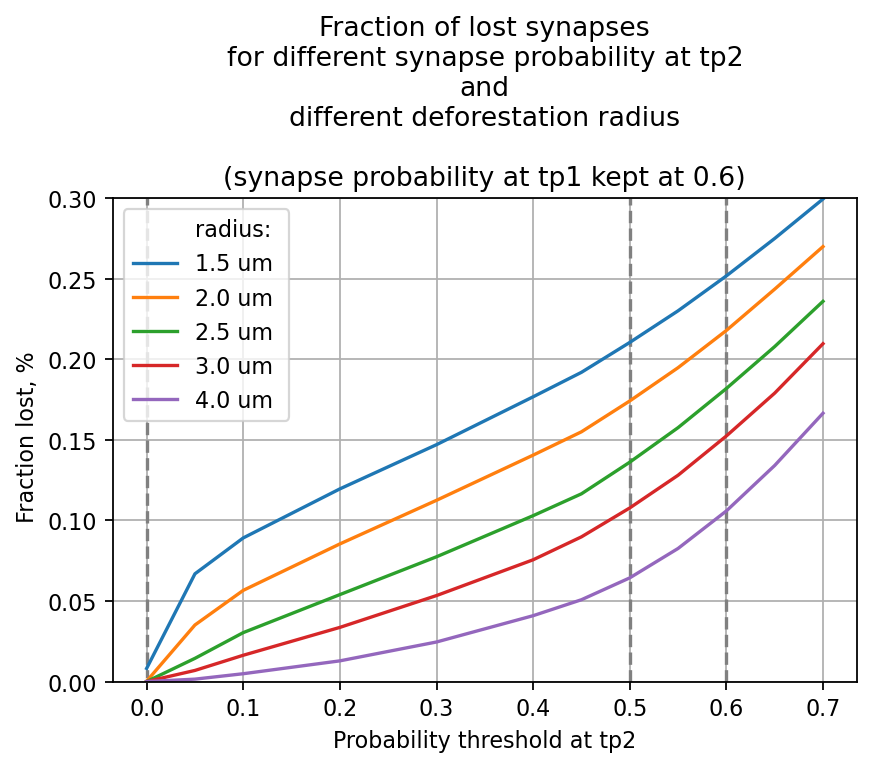

In [ ]:
fig = plt.figure(dpi = 160)

plt.plot(0,0,'.w')
for radius in [1.5,2.0,2.5,3.0,4.0]:
  plt.plot(thr_list,fr_lost[f'radius {radius}'])

plt.vlines([0,0.5,0.6],ymin = 0, ymax = 0.3, linestyles='dashed', colors = 'grey')

plt.grid()
plt.title(f'Fraction of lost synapses\nfor different synapse probability at tp2\nand\ndifferent deforestation radius\n\n(synapse probability at tp1 kept at 0.6)')
plt.xlabel('Probability threshold at tp2')
plt.ylabel(' Fraction lost, %')
plt.legend(['radius:','1.5 um ','2.0 um ','2.5 um ','3.0 um ','4.0 um'])
plt.ylim(bottom = 0, top = 0.3)

In [104]:
diff_img = Image(resolution, img = np.abs(fixed_prob.img - warped_prob.img))
imgptc = ImagePointsView(images = {'fixed_prob' : fixed_prob,'warped_prob' : warped_prob, 'diff' : diff_img},
                         point_clouds = {'lost':sp.lost, 'gained':sp.gained,'all_before':filtered_warped_lm1},
                         resolution = [0.658, 0.23, 0.23])
imgptc.view_in_napari(['red','green','cyan'],['cyan','yellow','magenta'])